In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
def readData(filename):
    df = pd.read_csv(filename)
    return df.values

x = readData('./data/LinearX.csv')
# x = x.reshape(99,)
y = readData('./data/LinearY.csv')
# y = y.reshape(99,)
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


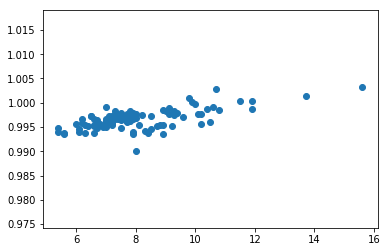

In [19]:
plt.scatter(x,y)
plt.show()

# Visualise and Preprocessing

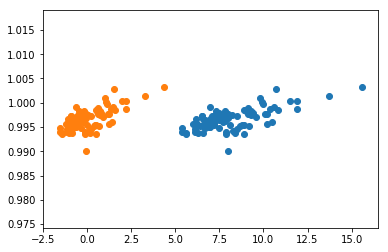

In [20]:
X = (x-x.mean())/x.std()
Y = y
plt.scatter(x,y)
plt.scatter(X,Y)

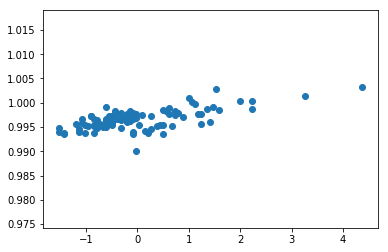

In [21]:
plt.scatter(X,Y)

# Gradient Descent Algorithm
- Start with a random theta
- Repeat till convergencce
    - Update theta according to rule

In [22]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x
    # x is some scaler
    # theta of form [0 1]

def error(X,Y,theta):
    
    m = X.shape[0] #total no of samples
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx - y[i])**2 
        
    return error

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += hx - Y[i]
        grad[1] += (hx - Y[i])*X[i]
        
    return grad

# Main ALGO
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.zeros((2,))
    itr = 0
    max_itr = 100
    
    error_list = []
    
    while itr<max_itr :
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
        
    return theta,error_list



In [23]:
final_theta,error_list = gradientDescent(X,Y)

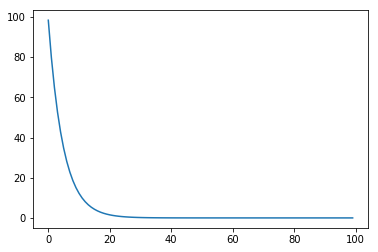

In [24]:
plt.plot(error_list)
plt.show()

In [25]:
print(final_theta)

[0.99660456 0.0013579 ]


In [26]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


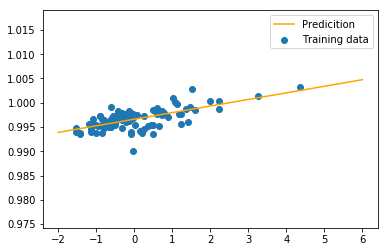

In [27]:
plt.scatter(X,Y,label = 'Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),c="orange",label = 'Predicition') 
# xtest = x plot, hypothesis(xtest,final_theta) = y plot
plt.legend()
plt.show()